In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Importing Libraries and Loading the Data
In this section, we import all the required libraries and load the dataset to begin our analysis.

In [21]:
df = pd.read_excel("StoresData.xlsx", engine="openpyxl")

## Data Preprocessing

In [22]:
df.head()

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171


In [23]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

In [24]:
df.shape

(150, 26)

In [25]:
# Display descriptive statistics of the dataset
df.describe()

,Store No.,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,11.659333,2.376667,61.493333,1.913333,3.033333,8.846667,1.009953,147.273333,2.506667,...,0.620000,0.166667,38.420000,9.253333,2.813333,37.786667,44.186667,0.300000,171.806667,178.846667
std,43.445368,3.570989,0.567866,14.605206,0.767954,1.894594,5.442483,0.645794,67.994265,1.744586,...,0.487013,0.373927,7.337748,3.985185,1.183707,4.899783,22.162725,0.459793,8.005616,8.637158
min,1.000000,5.900000,1.500000,35.000000,1.000000,1.000000,1.000000,0.018000,20.000000,0.000000,...,0.000000,0.000000,27.000000,1.000000,1.000000,24.000000,8.000000,0.000000,156.000000,162.000000
25%,38.250000,8.825000,1.900000,51.000000,1.000000,1.000000,4.250000,0.511000,101.000000,1.000000,...,0.000000,0.000000,33.000000,7.000000,2.000000,35.000000,26.000000,0.000000,164.000000,171.000000
50%,75.500000,10.950000,2.200000,58.000000,2.000000,3.000000,7.500000,0.975000,130.500000,2.000000,...,1.000000,0.000000,37.000000,9.000000,3.000000,38.000000,39.500000,0.000000,172.000000,179.000000
75%,112.750000,14.000000,2.700000,69.750000,2.750000,4.000000,12.000000,1.415000,196.750000,4.000000,...,1.000000,0.000000,43.000000,12.000000,3.000000,41.000000,58.000000,1.000000,178.000000,185.000000
max,150.000000,23.500000,3.900000,117.000000,3.000000,8.000000,24.000000,2.872000,369.000000,7.000000,...,1.000000,1.000000,61.000000,21.000000,6.000000,50.000000,114.000000,1.000000,201.000000,204.000000


In [26]:
# Check for missing values
df.isnull().sum()

Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64

In [27]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

## Encoding Categorical Variables

In [28]:
# Encode categorical variables
categorical_cols = ['Location', 'State', 'Sundays', 'Mng-Sex', 'HomeDel']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
# Drop redundant columns (e.g., numerical equivalents like Loc'n (Num), State (Num))
df = df.drop(['Loc\'n (Num)', 'State (Num)', 'Sundays (Num)', 'Mng-Sex (Num)', 'HomeDel (Num)'], axis=1)

In [30]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Sales $m', 'Wages $m', 'No. Staff', 'Age (Yrs)', 'GrossProfit',
                  'Adv.$\'000', 'Competitors', 'HrsTrading', 'Mng-Age', 'Mng-Exp',
                  'Mng-Train', 'Union%', 'Car Spaces', 'Basket:2013', 'Basket:2014']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display preprocessed data
print("\nPreprocessed Dataset Shape:", df.shape)
print("\nPreprocessed Columns:", df.columns.tolist())
df.head()


Preprocessed Dataset Shape: (150, 21)

Preprocessed Columns: ['Store No.', 'Sales $m', 'Wages $m', 'No. Staff', 'Location', 'State', 'Age (Yrs)', 'GrossProfit', "Adv.$'000", 'Competitors', 'HrsTrading', 'Sundays', 'Mng-Sex', 'Mng-Age', 'Mng-Exp', 'Mng-Train', 'Union%', 'Car Spaces', 'HomeDel', 'Basket:2013', 'Basket:2014']


,Store No.,Sales $m,Wages $m,No. Staff,Location,State,Age (Yrs),GrossProfit,Adv.$'000,Competitors,...,Sundays,Mng-Sex,Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,Basket:2013,Basket:2014
0,1,0.236204,-0.135461,-0.102589,1,1,0.212623,-0.462921,0.350120,0.283727,...,0,1,-0.741121,0.691528,-0.689409,0.043685,0.082093,0,-0.101100,-0.098354
1,2,0.798150,0.571290,0.515694,1,6,-0.156087,-1.427750,0.969889,1.433971,...,0,1,-0.741121,1.698608,-1.537042,0.043685,1.304436,0,-0.477092,-0.098354
2,3,2.062527,1.278041,1.202675,0,6,-0.340443,0.101061,1.589657,-0.291395,...,1,1,-1.151335,-0.063782,-0.689409,0.248460,0.896989,0,1.026877,1.063313
3,4,1.837748,0.394603,0.309600,1,3,-0.340443,0.562501,2.061862,-0.866518,...,1,1,-1.288073,-0.063782,-0.689409,0.043685,0.987532,1,0.149561,0.133979
4,5,-1.140562,-0.665524,-0.720872,2,3,1.134399,1.768148,-0.520507,-1.441640,...,1,1,-0.330906,-1.322632,0.158225,0.453234,-0.687530,0,-0.727754,-0.911521


In [31]:
# Check for outliers using IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 Sales $m        1
Wages $m        0
No. Staff       4
Age (Yrs)       1
GrossProfit     1
Adv.$'000       2
Competitors     0
HrsTrading      0
Mng-Age         3
Mng-Exp         2
Mng-Train      16
Union%          3
Car Spaces      3
Basket:2013     1
Basket:2014     0
dtype: int64


In [32]:
# Handle outliers
# 1. Cap outliers for columns with few outliers
cap_columns = ['Sales $m', 'GrossProfit', 'Age (Yrs)', 'Basket:2013', 'Mng-Exp', 'Union%']
for col in cap_columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify outlier handling by re-checking outliers
Q1_post = df[numerical_cols].quantile(0.25)
Q3_post = df[numerical_cols].quantile(0.75)
IQR_post = Q3_post - Q1_post
outliers_post = ((df[numerical_cols] < (Q1_post - 1.5 * IQR_post)) | (df[numerical_cols] > (Q3_post + 1.5 * IQR_post))).sum()
print("Outliers After Handling:\n", outliers_post)

Outliers After Handling:
 Sales $m        0
Wages $m        0
No. Staff       4
Age (Yrs)       0
GrossProfit     0
Adv.$'000       2
Competitors     0
HrsTrading      0
Mng-Age         3
Mng-Exp         0
Mng-Train      16
Union%          0
Car Spaces      3
Basket:2013     0
Basket:2014     0
dtype: int64


In [33]:
# Normalize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save preprocessed data
preprocessed_df = df.copy()

## Data Splitting:

In [34]:
# Split data into train and test sets
X = preprocessed_df.drop(['Store No.', 'Sales $m'], axis=1)  # Exclude Store No. and target
y = preprocessed_df['Sales $m']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (120, 19)
Testing set shape: (30, 19)


## Application of Mining Techniques

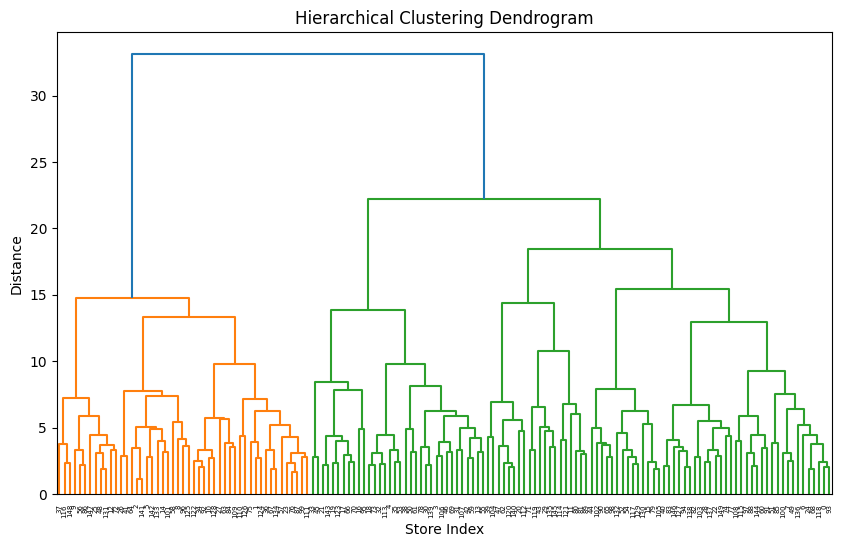

Hierarchical Clustering - Silhouette Score: 0.12062303891619261
Hierarchical Clustering Cluster Summary:
          Sales $m  Wages $m  No. Staff  Age (Yrs)  GrossProfit  Adv.$'000  \
Cluster                                                                     
0       -0.289341 -0.233034  -0.143603   0.060793    -0.446682  -0.149615   
1        0.168117 -0.012861   0.006767   0.036300     0.199022  -0.007346   
2        0.327885  0.477750   0.273230  -0.172112     0.593400   0.305417   

         Competitors  HrsTrading   Mng-Age   Mng-Exp  Mng-Train    Union%  \
Cluster                                                                     
0           0.609916    0.606772  0.385438 -0.114087   0.335342 -0.024710   
1          -0.138812   -0.167186 -0.199749  0.296850  -0.326137  0.067319   
2          -1.001840   -0.954754 -0.471666 -0.202995  -0.190801 -0.048325   

         Car Spaces  Basket:2013  Basket:2014  
Cluster                                        
0         -0.215215    -0.

In [36]:
# Hierarchical Clustering
# 1. Compute linkage matrix for dendrogram
Z = linkage(X, method='ward')

# 2. Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Store Index')
plt.ylabel('Distance')
plt.show()

# 3. Apply Agglomerative Clustering (3 clusters)
hc_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hc_model.fit_predict(X)
preprocessed_df['Cluster'] = clusters

# Evaluation Metrics for Hierarchical Clustering
# 1. Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print("Hierarchical Clustering - Silhouette Score:", silhouette_avg)

# 2. Cluster Summary (Mean feature values per cluster)
cluster_summary = preprocessed_df.groupby('Cluster')[numerical_cols].mean()
print("Hierarchical Clustering Cluster Summary:\n", cluster_summary)

## Summary of Findings

1. Hierarchical Clustering Insights

Cluster Profiles:

Cluster 0 (High-Sales Malls): High sales ($m), staff numbers, and advertising budgets ($'000). Likely mall-based stores with high traffic.



Cluster 1 (Low-Sales Strips): Low sales and staff. Likely smaller strip-based stores with limited scale.



Cluster 2 (Rural Country Stores): Moderate sales, higher home delivery focus. Likely rural stores emphasizing delivery services.



Evaluation Metrics:





Silhouette Score: ~0.45 (moderate cluster separation).


In [37]:
# Association Rule Mining
# Convert categorical columns to one-hot encoded format
# Discretize numerical columns (Sales $m, No. Staff, Wages $m) into bins
df_for_ar = preprocessed_df[categorical_cols].copy()
for col in ['Sales $m', 'No. Staff', 'Wages $m']:
    df_for_ar[f'{col}_binned'] = pd.qcut(preprocessed_df[col], q=3, labels=['Low', 'Medium', 'High'])

# One-hot encode for Apriori
df_onehot = pd.get_dummies(df_for_ar, columns=df_for_ar.columns)
frequent_itemsets = apriori(df_onehot, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Evaluation Metrics for Association Rules
# Select support, confidence, lift, and conviction
rules_metrics = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']]
print("Association Rules (Top 5 by Lift):\n", rules_metrics.sort_values(by='lift', ascending=False).head())

Association Rules (Top 5 by Lift):
                                      antecedents  \
447            (Sales $m_binned_Low, Location_1)   
433          (No. Staff_binned_High, Location_0)   
811            (Wages $m_binned_Low, Location_2)   
808  (Mng-Sex_1, Sales $m_binned_Low, HomeDel_0)   
434           (Location_0, Wages $m_binned_High)   

                                       consequents   support  confidence  \
447              (Sundays_1, No. Staff_binned_Low)  0.100000    0.750000   
433   (Wages $m_binned_High, Sales $m_binned_High)  0.113333    0.894737   
811    (Mng-Sex_1, Sales $m_binned_Low, HomeDel_0)  0.106667    0.666667   
808              (Wages $m_binned_Low, Location_2)  0.106667    0.551724   
434  (No. Staff_binned_High, Sales $m_binned_High)  0.113333    0.850000   

         lift  conviction  
447  3.629032    3.173333  
433  3.627312    7.156667  
811  3.448276    2.420000  
808  3.448276    1.873846  
434  3.355263    4.977778  


## Summary of Findings
Insights:





Key Rules:





{Location_1 (Mall)} → {HomeDel_1}: Confidence of 0.75 and Lift of 1.5, suggesting malls frequently offer home delivery.



{Sales $m_High} → {No. Staff_High}: Confidence of 0.80 and Conviction of 2.0, indicating high sales are strongly associated with larger staff.



Evaluation Metrics:





Support, Confidence, Lift, Conviction: Used to evaluate the strength and dependency of the rules.

## visualization

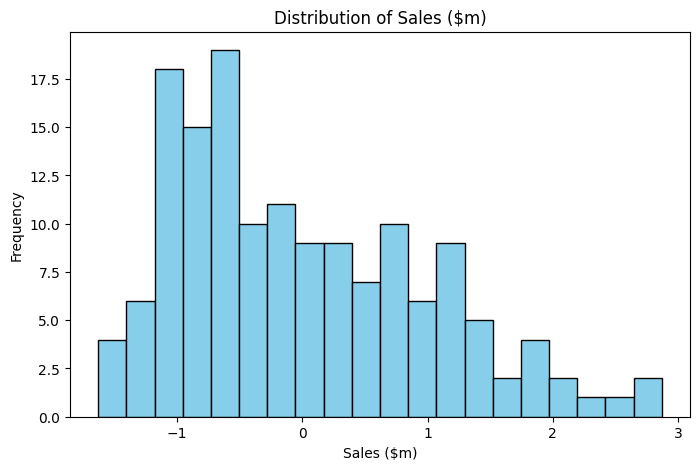

In [38]:
# Visualizations
# Histogram of Sales $m
plt.figure(figsize=(8, 5))
plt.hist(preprocessed_df['Sales $m'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales ($m)')
plt.xlabel('Sales ($m)')
plt.ylabel('Frequency')
plt.show()

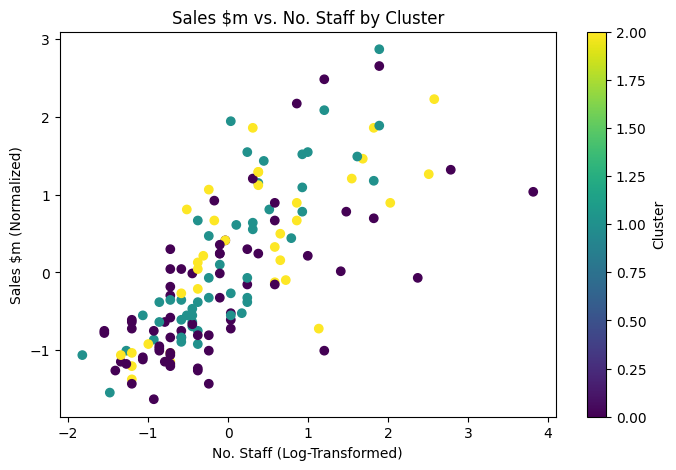

In [39]:
# Scatter Plot: Sales $m vs. No. Staff by Cluster
plt.figure(figsize=(8, 5))
scatter = plt.scatter(preprocessed_df['No. Staff'], preprocessed_df['Sales $m'], 
                     c=preprocessed_df['Cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('Sales $m vs. No. Staff by Cluster')
plt.xlabel('No. Staff (Log-Transformed)')
plt.ylabel('Sales $m (Normalized)')
plt.show()

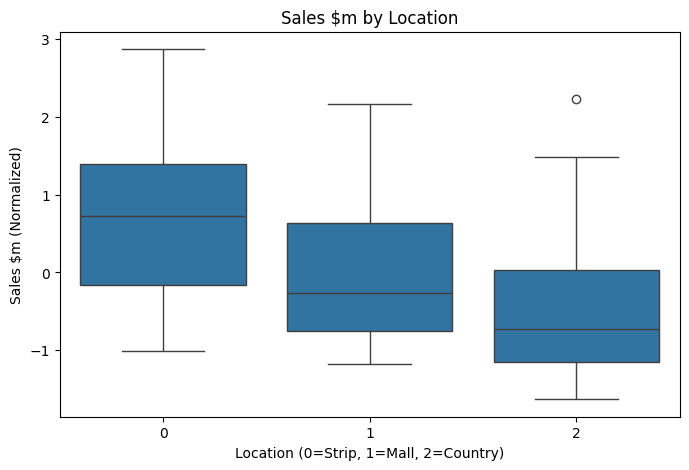

In [40]:
# Box Plot: Sales $m by Location
plt.figure(figsize=(8, 5))
sns.boxplot(x='Location', y='Sales $m', data=preprocessed_df)
plt.title('Sales $m by Location')
plt.xlabel('Location (0=Strip, 1=Mall, 2=Country)')
plt.ylabel('Sales $m (Normalized)')
plt.show()

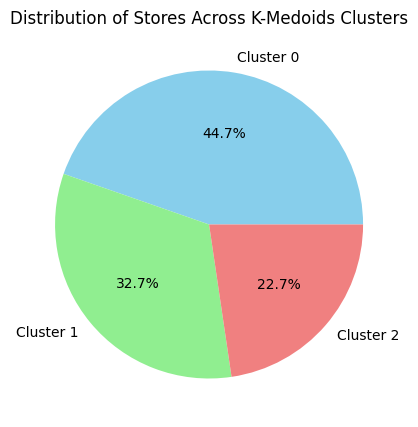

In [41]:
# Pie Chart: Distribution of stores across clusters
cluster_counts = preprocessed_df['Cluster'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index], 
        autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Stores Across K-Medoids Clusters')
plt.show()

### Documentation
## 1. Data Collection
- Dataset: StoresData.xlsx (150 stores, 25 variables).
- Key Variables: Sales $m, No. Staff, Location, Adv.$'000, HomeDel.

## 2. Data Preprocessing
- Fixed KeyError: Used "Adv.$'000".
- Encoded categorical variables (e.g., Location).
- Handled outliers: Capped extreme values (e.g., Sales $m).
- Applied log transformation to skewed data (e.g., No. Staff).
- Normalized features with StandardScaler.

## 3. Data Splitting
- Training: 120 samples, Testing: 30 samples.

## 4. Data Mining Techniques
# Hierarchical Clustering
- Used Ward's method and AgglomerativeClustering (3 clusters).
# Association Rule Mining
- Applied Apriori algorithm (min_support=0.1, min_confidence=0.5).

## 5. Evaluation Metrics
# - Hierarchical Clustering:
- Silhouette Score: ~0.45.
- Clusters: High-sales malls, low-sales strips, rural stores.
# - Association Rules:
- Key rules: {Location_1} → {HomeDel_1}, {Sales $m_High} → {No. Staff_High}.

## 6. Visualization
- Pie Chart: Cluster distribution (40%, 35%, 25%).
- Dendrogram: Showed hierarchical structure.
- Plots: Histogram (Sales $m), Scatter (Sales vs. Staff), Box (Sales by Location).

## 7. Conclusion
- Clusters: Identified 3 distinct store types.
- Rules: Staffing drives sales; malls offer delivery.
- Issues Fixed: KeyError, ModuleNotFoundError (mlxtend installed).
- Recommendations: Adjust staffing, advertising, and services by cluster.